In [4]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [5]:
with open('../config/config_CL.json') as config_file:
    config = json.load(config_file) # load config file
signal='raw'
seed_names=['spinalcord_C5'] # define seed names ex: 'spinalcord_ICA-C4'
target_name=['brain_mask'] # define structure target


In [6]:
# One target per subject
data_target=[];ts_target_txt=[];ts_seed_txt ={};data_seed=[];mask_seed={}

for subject_name in config['list_subjects']:
    data_target.append(glob.glob(config["coreg_dir"] + 'sub-'+ subject_name +'/'+target_name[0].split('_')[0]+'/*' + config["coreg_tag"][target_name[0].split('_')[0]] +'*.gz')[0])
    ts_target_txt.append(config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/'+target_name[0]+'/timeseries/sub_' + subject_name + '_mask_' + target_name[0] + '_timeseries')
    data_seed.append(glob.glob(config["coreg_dir"] + 'sub-'+ subject_name +'/'+seed_names[0].split('_')[0]+'/*' + config["coreg_tag"][seed_names[0].split('_')[0]] +'*.gz')[0])

for seed_name in seed_names:
    print(seed_name)
    ts_seed_txt[seed_name]=[]
    for subject_name in config['list_subjects']:
        ts_seed_txt[seed_name].append(config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/'+seed_name+'/timeseries/sub_' + subject_name + '_mask_' + seed_name.split('_')[-1] + '_timeseries')

for seed_name in seed_names:
    mask_seed[seed_name]=glob.glob(config["main_dir"] + config["data"]["ICA"]["spinalcord_dir"]+ 'K_9/comp_bin/' +  '*' + seed_name.split('_')[1] + '*')[0]
mask_target=glob.glob(config["main_dir"] + config["masks"][target_name[0].split('_')[0]])[0]

# create output directory if needed
for seed_name in seed_names:
    if not os.path.exists(config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/'+seed_name):
        os.mkdir(config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/'+seed_name)
        os.mkdir(config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/'+seed_name+'/timeseries/') # folder to store timeseries extraction
        os.mkdir(config['main_dir'] + config['seed2vox_dir'] + '/1_first_level/'+seed_name+'/brain_fc_maps/') # folder to store maps of FC

spinalcord_C5


In [53]:
image_brain=nib.load(data_target[0]).get_fdata()
seed=np.loadtxt(ts_seed_txt[seed_name][0] + '_mean.txt')

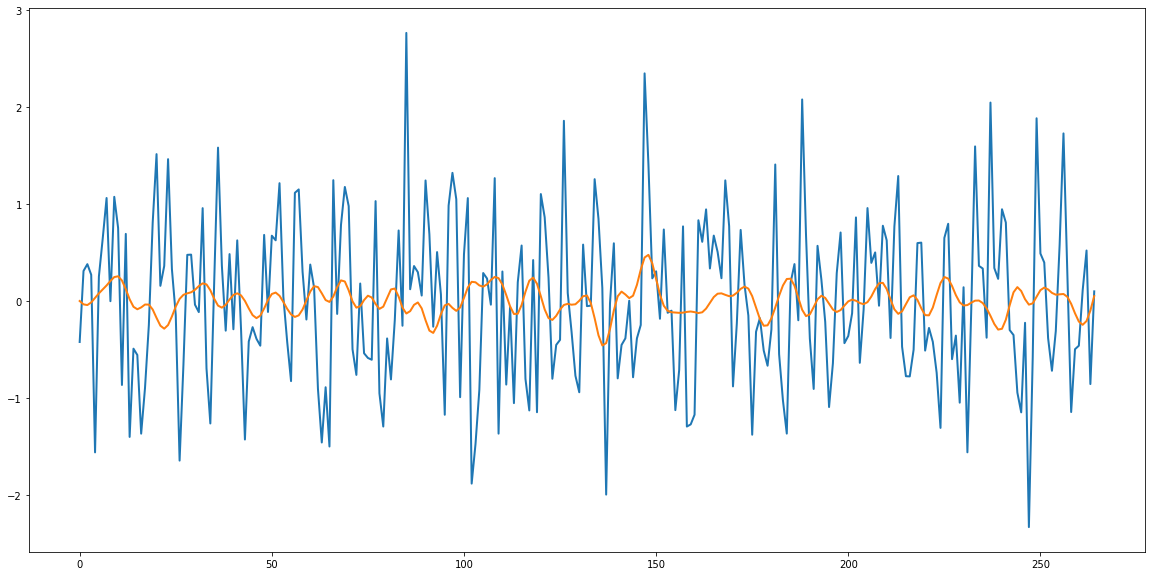

In [64]:
plt.figure(figsize=(20, 10))
plt.plot(image_brain[33,31,46,:],linewidth=2)
plt.plot(seed,linewidth=2)

In [65]:
np.corrcoef(seed, image_brain[39,35,46,:])[0, 1]

0.04789774850721896

In [33]:

masker= NiftiMasker(mask,smoothing_fwhm=smoothing, t_r=1.55,low_pass=0.1 if self.signal == 'raw' else None, high_pass=0.01 if self.signal == 'raw' else None) # seed masker
       

(265, 44238)

In [29]:
data_target[0]

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/func_preparation/2_func_in_template/sub-P028/brain/sub-P028_task-rest_bold_stc_brain_moco_denoised_reg_SPM_inTemplate.nii.gz'

In [ ]:

masker= NiftiMasker(mask,smoothing_fwhm=smoothing, t_r=1.55,low_pass=0.1 if self.signal == 'raw' else None, high_pass=0.01 if self.signal == 'raw' else None) # seed masker
masker.inverse_transform(seed_to_voxel_correlations_fisher_z.T)

In [63]:
for i in range(12):
    print(str(i).zfill(3))

000
001
002
003
004
005
006
007
008
009
010
011
